In [38]:
from PIL import Image
from PIL import ImageFilter 
import skimage 
from skimage import io, exposure, filters, morphology 
from skimage.filters import unsharp_mask
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy.ndimage import convolve
import sklearn 
import math

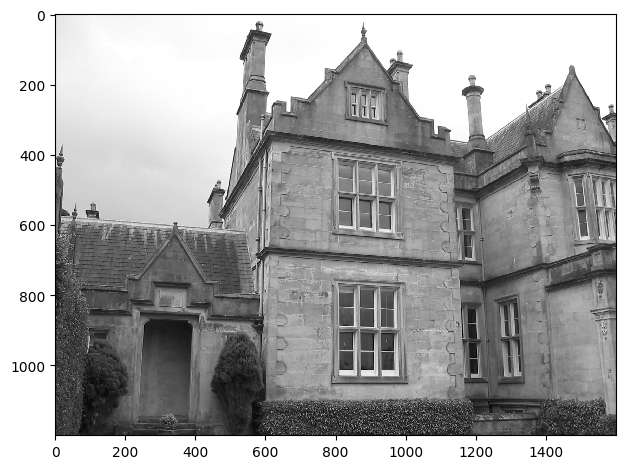

In [48]:
original = io.imread('./Images/ireland-03gray.tif')
im = io.imread('./Images/ireland-03gray.tif')
im = unsharp_mask(im, radius=1, amount=10) #increase contrast around edges for better edge detection
im = filters.gaussian(im, sigma=5) #apply guassian blurr to remove noise
io.imshow(original)
io.show()

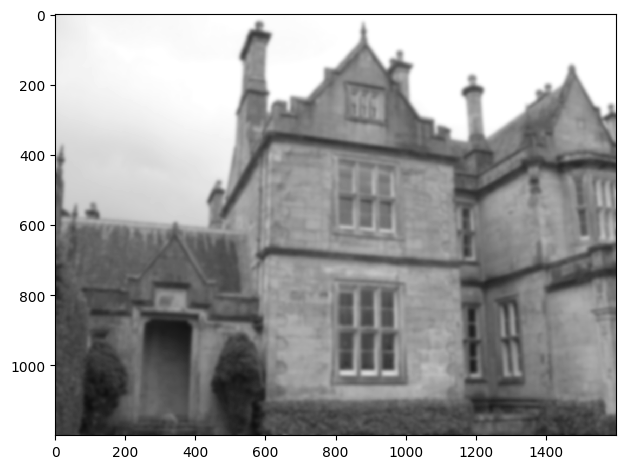

In [57]:
#After gaussian is applied to blurr and remove noise and unsharp mask increases contrast around edges
io.imshow(im)
io.show()

In [58]:
#The sobel filter is a combination of an averaging vector and a step function. The step function is critical for detecting edges.
#Essentially when the portion of the image the filter is being applied to is similar to the filter being applied over it, there is
#a stronger response (a hightened contrast between darker and lighter portions of the image). The opposite is true if the filter is
#being applied over a part of the image that is the opposite of the filter.


#apply vertical sobel filter
sobelY = np.array([[-1, 0, 1],   
                   [-2, 0, 2], 
                   [-1, 0, 1]]) 

#apply horizontal sobel filter
sobelX = np.array([[ 1, 2, 1],   
                   [ 0, 0, 0], 
                   [-1,-2,-1]]) 

sobelYim = convolve(im, sobelY, mode = 'constant', cval = 0)
sobelXim = convolve(im, sobelX, mode = 'constant', cval = 0)

The following two images result from convolution of the image with the vertical sobel filter and horizontal sobel filter. The convolution function takes each pixel in the image and applies the filter to it. Applying the filter means on (x,y) means that the filter matrix is centered over (x,y) and the new (x,y) value is the sum of the product between coefficients in the filter matrix and their corresponding pixels in the image.

The negative parts of the images are from negative responses meaning that there were brighter pixels under the negative portion of the sobel filter and darker pixels under the positive portion of the sobel filter.

The positive parts of the image are the opposite: brighter pixels under positive portions of the image and darker pixels under negative portions of the image.

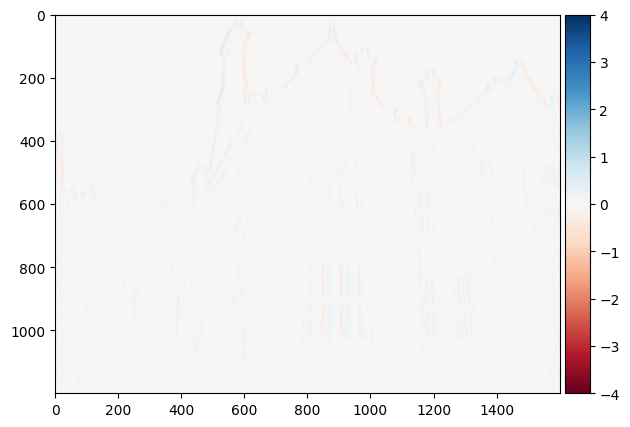

In [59]:
io.imshow(sobelYim)
io.show()

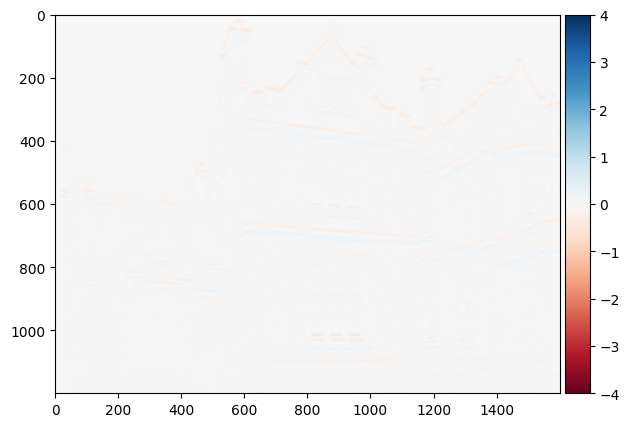

In [60]:
io.imshow(sobelXim)
io.show()

In [61]:
#combine the gradients

combinedGradients = []
for i in range(min(len(sobelXim),len(sobelYim))):
    combinedGradients.append([])
    for j in range(min(len(sobelXim[i]), len(sobelYim[i]))):
        combinedGradients[i].append(math.sqrt((sobelXim[i][j] ** 2) + (sobelYim[i][j] ** 2)))
combinedGradients = np.array(combinedGradients)


The image is convoluted with both a vertical and horizontal sobel filter to detect both vertical and horizontal edges. As mentioned above, there are portions of the convoluted images that are positive and negative. Both are needed, since we want ALL edges.

The code directly above this block combines the magnitudes of the gradients in both parts to form one image. Every single value is squared, therefore both negative and positive values are magnified and are all positive now. From here, the values could be thresholded to obtain cleaner edges. However, in order to apply a highlighting effect onto the original image, I am choosing not to threshold in order to maintain the current gradients.

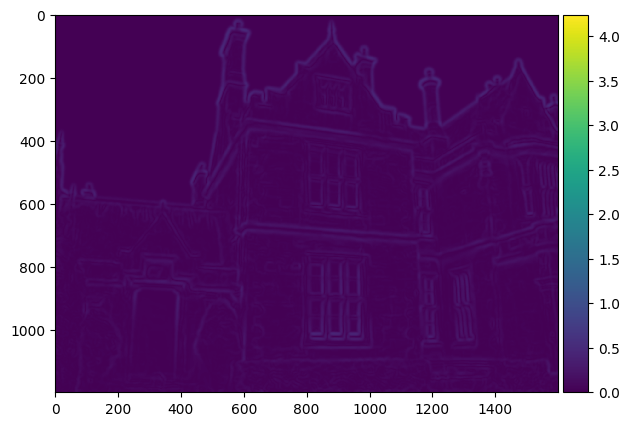

In [62]:
io.imshow(combinedGradients)
io.show()

In [54]:
#blackish hilights

blackHighlights = []
for i in range(min(len(combinedGradients),len(original))):
    blackHighlights.append([])
    for j in range(min(len(combinedGradients[i]),len(original[i]))):
        scale = 1000
        if(int(original[i][j] - scale * combinedGradients[i][j]) < 0):
            blackHighlights[i].append(0)
        else:
            blackHighlights[i].append(int(original[i][j] - scale * combinedGradients[i][j]))
blackHighlights = np.array(blackHighlights)


#whitish hilights

whiteHighlights = []
for i in range(min(len(combinedGradients),len(original))):
    whiteHighlights.append([])
    for j in range(min(len(combinedGradients[i]),len(original[i]))):
        scale = 1000
        whiteHighlights[i].append(min(255,int(original[i][j] + scale * combinedGradients[i][j])))
whiteHighlights = np.array(whiteHighlights)

Here, for white highlights, I simply added the values in the combined gradients image with a scalar (because the skimage convolve function collasped everything into a very small range) to the original image to make them whiter.

I subtracted the values in the combined gradients image with a scalar from the original image in order to achieve blackish highlights.


C:\Users\jimxa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


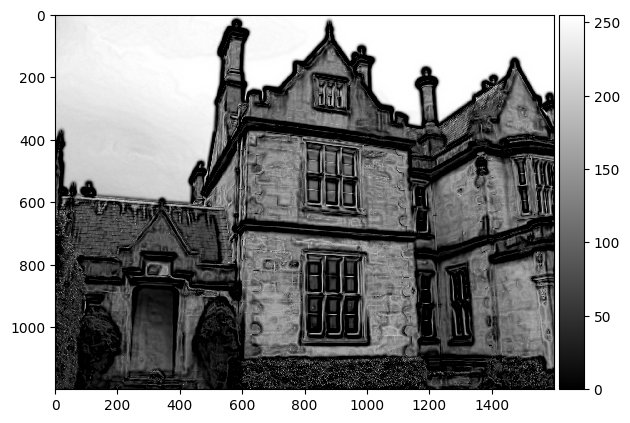

In [55]:
io.imshow(blackHighlights, cmap=plt.cm.gray)
io.show()

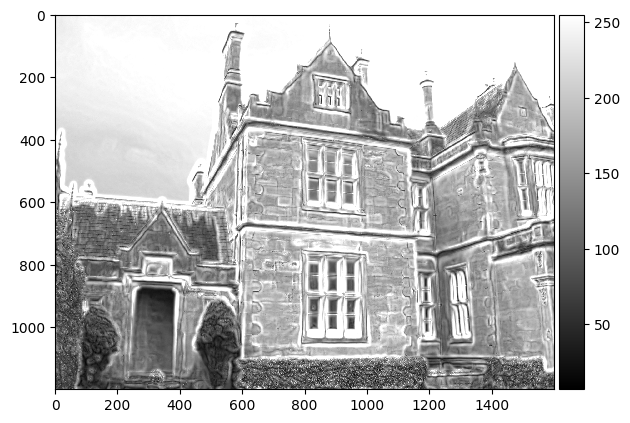

In [56]:
io.imshow(whiteHighlights, cmap=plt.cm.gray)
io.show()